# Importing Basic Libraries

In [88]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

# Zip path

In [2]:
Archive=r'C:\Users\nmrnt\Desktop\Data Science\Sandy_deepLearning\Projects\Face mask Detection\archive.zip'

In [3]:
from zipfile import ZipFile

In [4]:
with ZipFile(Archive,'r') as z:
    z.extractall()
print('Archive Extraction done')

Archive Extraction done


In [89]:
import os
for dirname, _, filenames in os.walk(r'C:\Users\nmrnt\Desktop\Data Science\Sandy_deepLearning\Projects\Face mask Detection\N!\input\images'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\nmrnt\Desktop\Data Science\Sandy_deepLearning\Projects\Face mask Detection\N!\input\images\maksssksksss0.png
C:\Users\nmrnt\Desktop\Data Science\Sandy_deepLearning\Projects\Face mask Detection\N!\input\images\maksssksksss1.png
C:\Users\nmrnt\Desktop\Data Science\Sandy_deepLearning\Projects\Face mask Detection\N!\input\images\maksssksksss10.png
C:\Users\nmrnt\Desktop\Data Science\Sandy_deepLearning\Projects\Face mask Detection\N!\input\images\maksssksksss100.png
C:\Users\nmrnt\Desktop\Data Science\Sandy_deepLearning\Projects\Face mask Detection\N!\input\images\maksssksksss101.png
C:\Users\nmrnt\Desktop\Data Science\Sandy_deepLearning\Projects\Face mask Detection\N!\input\images\maksssksksss102.png
C:\Users\nmrnt\Desktop\Data Science\Sandy_deepLearning\Projects\Face mask Detection\N!\input\images\maksssksksss103.png
C:\Users\nmrnt\Desktop\Data Science\Sandy_deepLearning\Projects\Face mask Detection\N!\input\images\maksssksksss104.png
C:\Users\nmrnt\Desktop\Data Science\Sandy_dee

In [90]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import os
!pip install mtcnn
from mtcnn import MTCNN
import cv2
import json

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [91]:
lr = 1e-4
bs = 32
epochs = 20

In [92]:
annotations_dir=r'C:\Users\nmrnt\Desktop\Data Science\Sandy_deepLearning\Projects\Face mask Detection\N!\input\annotations'
images_dir=r'C:\Users\nmrnt\Desktop\Data Science\Sandy_deepLearning\Projects\Face mask Detection\N!\input\images'

In [93]:
import xml.etree.ElementTree as et

In [94]:
#parsing data in a csv format

dic = {"image": [],"Dimensions": []}
for i in range(1,116):
    dic[f'Object {i}']=[]

for file in os.listdir(r"C:\Users\nmrnt\Desktop\Data Science\Sandy_deepLearning\Projects\Face mask Detection\N!\input\annotations"):
    row = []
    xml = et.parse(r"C:\Users\nmrnt\Desktop\Data Science\Sandy_deepLearning\Projects\Face mask Detection\N!\input\annotations\\"+ file) 
    root = xml.getroot()
    img = root[1].text
    row.append(img)
    h,w = root[2][0].text,root[2][1].text
    row.append([h,w])

    for i in range(4,len(root)):
        temp = []
        temp.append(root[i][0].text)
        for point in root[i][5]:
            temp.append(point.text)
        row.append(temp)
        
    for i in range(len(row),119):
        row.append(0)
        
    for i,each in enumerate(dic):
        dic[each].append(row[i])
        
df = pd.DataFrame(dic)
df.head()

,image,Dimensions,Object 1,Object 2,Object 3,Object 4,Object 5,Object 6,Object 7,Object 8,...,Object 106,Object 107,Object 108,Object 109,Object 110,Object 111,Object 112,Object 113,Object 114,Object 115
0,maksssksksss0.png,"[512, 366]","[without_mask, 79, 105, 109, 142]","[with_mask, 185, 100, 226, 144]","[without_mask, 325, 90, 360, 141]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,maksssksksss1.png,"[400, 156]","[with_mask, 321, 34, 354, 69]","[with_mask, 224, 38, 261, 73]","[with_mask, 299, 58, 315, 81]","[with_mask, 143, 74, 174, 115]","[with_mask, 74, 69, 95, 99]","[with_mask, 191, 67, 221, 93]","[with_mask, 21, 73, 44, 93]","[with_mask, 369, 70, 398, 99]",...,0,0,0,0,0,0,0,0,0,0
2,maksssksksss10.png,"[301, 400]","[with_mask, 98, 267, 194, 383]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,maksssksksss100.png,"[400, 226]","[with_mask, 189, 30, 245, 88]","[with_mask, 387, 54, 400, 75]","[with_mask, 118, 87, 163, 126]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,maksssksksss101.png,"[301, 400]","[with_mask, 48, 294, 164, 400]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
import glob

In [9]:
image_directories = sorted(glob.glob(os.path.join(r"C:\Users\nmrnt\Desktop\Data Science\Sandy_deepLearning\Projects\Face mask Detection\N!\input\images","*.png")))
j=0
classes = ["without_mask","mask_weared_incorrect","with_mask"]
labels = []
data = []

for idx,image in enumerate(image_directories):
    img  = cv2.imread(image)
    #scale to dimension
    X,Y = df["Dimensions"][idx]
    cv2.resize(img,(int(X),int(Y)))
    #find the face in each object
    for obj in df.columns[3:]:
        info = df[obj][idx]
        if info!=0:
            label = info[0]
            info[0] = info[0].replace(str(label), str(classes.index(label)))
            info=[int(each) for each in info]
            face = img[info[2]:info[4],info[1]:info[3]]
            if((info[3]-info[1])>40 and (info[4]-info[2])>40):
                try:
                    face = cv2.resize(face, (224, 224))
                    face = img_to_array(face)
                    face = preprocess_input(face)
                    data.append(face)
                    labels.append(label)
                    if(label=="mask_weared_incorrect"):
                        data.append(face)
                        labels.append(label)

                except:
                    pass
                
images = np.array(data, dtype="float32")
labels = np.array(labels)
print(len(images))
print(len(labels))

367
367


In [10]:
labels.shape

(367,)

In [11]:
lb = LabelEncoder()
labels = lb.fit_transform(labels)
print(labels[:10])
labels = to_categorical(labels)
print(labels[:10])

[1 1 1 1 1 1 1 2 1 1]
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [12]:
(trainX, testX, trainY, testY) = train_test_split(images, labels,
                                test_size=0.20, stratify=labels, random_state=42)
print(len(trainX))
print(len(trainY))
print(len(testX))
print(len(testY))

293
293
74
74


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

aug = ImageDataGenerator(
    zoom_range=0.2,
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
    )

In [14]:
baseModel = MobileNetV2(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224, 224, 3)))

#contruct headModel that will be on top of the baseModel
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(3, activation="softmax")(headModel)

#consruct the actual trainable model
model = Model(inputs=baseModel.input, outputs=headModel)

#loop base layers to freeze them (they won't be updated during the initial training process)
for layer in baseModel.layers:
    layer.trainable = False

In [15]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
______________________________________________________________________________________________

In [16]:
# compile model
opt = Adam(lr = lr, decay = lr / epochs)
model.compile(loss="binary_crossentropy", optimizer=opt,
    metrics=["accuracy"])

In [18]:
his = model.fit(aug.flow(trainX, trainY, batch_size=bs),
               steps_per_epoch=len(trainX)//bs,
               validation_data=(testX, testY),
               validation_steps=len(testX)//bs,
               epochs=epochs)

  ...
    to  
  ['...']
Train for 9 steps, validate on 74 samples
Epoch 1/20
9/9 [==============================] - 52s 6s/step - loss: 0.7773 - accuracy: 0.6309 - val_loss: 0.3430 - val_accuracy: 0.8594
Epoch 2/20
9/9 [==============================] - 46s 5s/step - loss: 0.4237 - accuracy: 0.8480 - val_loss: 0.3127 - val_accuracy: 0.8854
Epoch 3/20
9/9 [==============================] - 45s 5s/step - loss: 0.4944 - accuracy: 0.8723 - val_loss: 0.3146 - val_accuracy: 0.8854
Epoch 4/20
9/9 [==============================] - 49s 5s/step - loss: 0.3435 - accuracy: 0.8799 - val_loss: 0.2835 - val_accuracy: 0.8854
Epoch 5/20
9/9 [==============================] - 45s 5s/step - loss: 0.3669 - accuracy: 0.8863 - val_loss: 0.2729 - val_accuracy: 0.9167
Epoch 6/20
9/9 [==============================] - 43s 5s/step - loss: 0.3359 - accuracy: 0.8685 - val_loss: 0.2657 - val_accuracy: 0.9167
Epoch 7/20
9/9 [==============================] - 44s 5s/step - loss: 0.3294 - accuracy: 0.8774 - val_los

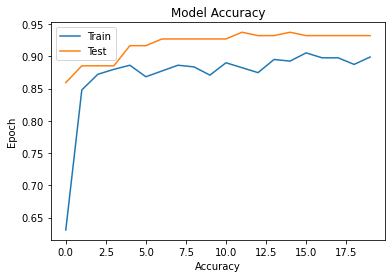

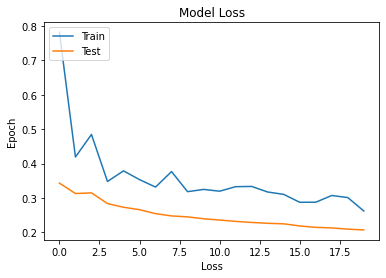

In [19]:
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Loss')
plt.ylabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [20]:
print(model.predict(testX, batch_size=bs))

[[3.94576928e-03 9.70105827e-01 2.59483941e-02]
 [3.29940859e-03 9.94746864e-01 1.95367471e-03]
 [3.14582214e-02 9.38805878e-01 2.97358893e-02]
 [5.91368275e-03 9.84290421e-01 9.79595445e-03]
 [5.45619875e-02 1.87829554e-01 7.57608473e-01]
 [6.54209545e-03 9.74734068e-01 1.87238008e-02]
 [1.09931119e-02 9.77325320e-01 1.16816396e-02]
 [1.07861869e-02 9.65709209e-01 2.35045571e-02]
 [5.86552843e-02 3.21884483e-01 6.19460225e-01]
 [2.78208149e-03 9.70774353e-01 2.64435392e-02]
 [6.65234122e-03 9.68045712e-01 2.53019463e-02]
 [7.15102553e-02 3.68210286e-01 5.60279429e-01]
 [2.91797798e-03 9.93947387e-01 3.13457684e-03]
 [1.13474261e-02 9.85096276e-01 3.55636794e-03]
 [2.50148913e-03 9.83488142e-01 1.40104145e-02]
 [7.28606014e-03 9.78865385e-01 1.38485581e-02]
 [1.42202266e-02 9.01470661e-01 8.43091086e-02]
 [6.37485906e-02 7.92532206e-01 1.43719196e-01]
 [2.03797314e-03 9.12746251e-01 8.52158293e-02]
 [6.72974810e-03 9.26333785e-01 6.69364035e-02]
 [1.04972189e-02 9.54860747e-01 3.464199

In [21]:
pred = model.predict(testX, batch_size=bs)
pred = np.argmax(pred, axis=1)
print(classification_report(testY.argmax(axis=1), pred, target_names=lb.classes_))

                       precision    recall  f1-score   support

mask_weared_incorrect       0.00      0.00      0.00         4
            with_mask       0.90      0.98      0.94        62
         without_mask       0.83      0.62      0.71         8

             accuracy                           0.89        74
            macro avg       0.58      0.54      0.55        74
         weighted avg       0.84      0.89      0.86        74



In [22]:
import os

In [23]:
annotations_dir=os.path.join(r'C:\Users\nmrnt\Desktop\Data Science\Sandy_deepLearning\Projects\Face mask Detection\N!\input\annotations')
images_dir=os.path.join(r'C:\Users\nmrnt\Desktop\Data Science\Sandy_deepLearning\Projects\Face mask Detection\N!\input\images')

In [24]:
a=os.listdir(images_dir)
b=os.listdir(annotations_dir)
a.sort()
b.sort()

In [25]:
print(a)

['maksssksksss0.png', 'maksssksksss1.png', 'maksssksksss10.png', 'maksssksksss100.png', 'maksssksksss101.png', 'maksssksksss102.png', 'maksssksksss103.png', 'maksssksksss104.png', 'maksssksksss105.png', 'maksssksksss106.png', 'maksssksksss107.png', 'maksssksksss108.png', 'maksssksksss109.png', 'maksssksksss11.png', 'maksssksksss110.png', 'maksssksksss111.png', 'maksssksksss112.png', 'maksssksksss113.png', 'maksssksksss114.png', 'maksssksksss115.png', 'maksssksksss116.png', 'maksssksksss117.png', 'maksssksksss118.png', 'maksssksksss119.png', 'maksssksksss12.png', 'maksssksksss120.png', 'maksssksksss121.png', 'maksssksksss122.png', 'maksssksksss123.png', 'maksssksksss124.png', 'maksssksksss125.png', 'maksssksksss126.png', 'maksssksksss127.png', 'maksssksksss128.png', 'maksssksksss129.png', 'maksssksksss13.png', 'maksssksksss130.png', 'maksssksksss131.png', 'maksssksksss132.png', 'maksssksksss133.png', 'maksssksksss134.png', 'maksssksksss135.png', 'maksssksksss136.png', 'maksssksksss137.p

In [26]:
print(len(b),len(a))

853 853


In [27]:
train_images=a[298:]
test_images=a[:298]

In [28]:
test_images[0]

'maksssksksss0.png'

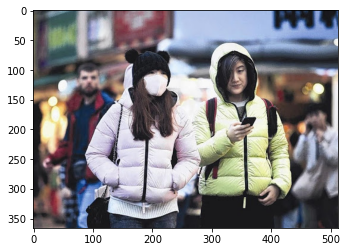

In [29]:
img=plt.imread(os.path.join(images_dir,test_images[0]))
plt.imshow(img)
plt.show()

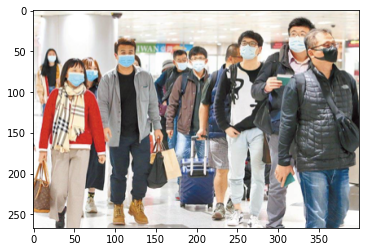

In [30]:
img=plt.imread(os.path.join(images_dir,train_images[1]))
plt.imshow(img)
plt.show()

In [87]:
detector=MTCNN()
img=cv2.imread(os.path.join(images_dir,train_images[2]))
face=detector.detect_faces(img)
for face in face:
        bounding_box=face['box']
        x=cv2.rectangle(img,
              (bounding_box[0], bounding_box[1]),
              (bounding_box[0]+bounding_box[2], bounding_box[1] + bounding_box[3]),
              (0,155,255),
              10)
        plt.imshow(x)

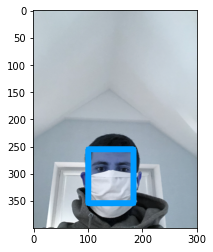

In [78]:
detector=MTCNN()
img=cv2.imread(os.path.join(images_dir,test_images[2]))
face=detector.detect_faces(img)
for face in face:
        bounding_box=face['box']
        x=cv2.rectangle(img,
              (bounding_box[0], bounding_box[1]),
              (bounding_box[0]+bounding_box[2], bounding_box[1] + bounding_box[3]),
              (0,155,255),
              10)
        plt.imshow(x)

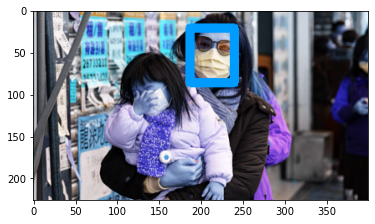

In [79]:
img=cv2.imread(os.path.join(images_dir,test_images[3]))
face=detector.detect_faces(img)
for face in face:
        bounding_box=face['box']
        x=cv2.rectangle(img,
              (bounding_box[0], bounding_box[1]),
              (bounding_box[0]+bounding_box[2], bounding_box[1] + bounding_box[3]),
              (0,155,255),
              10)
        plt.imshow(x)

In [67]:
detector = MTCNN()
test_df = []
for image in test_images:
    img = cv2.imread(os.path.join(images_dir, image))
    #img=np.array(img)
    #img=img.reshape(120,120,3)
    faces = detector.detect_faces(img)
    test = []
    for face in faces:
        bounding_box = face['box']
        test.append([image, bounding_box])
    test_df.append(test)


In [68]:
test = []
for i in test_df:
    if len(i)>0:
        if len(i)==1:
            test.append(i[0])
        else:
            for j in i:
                test.append(j)

In [69]:
sub=[]
rest_image=[]
for i in test:
    sub.append(i[0])
for image in test_images:
    if image not in sub:
        rest_image.append(image) 

In [70]:
detector=MTCNN()
test_df_=[]
for image in rest_image:
    img=cv2.imread(os.path.join(images_dir,image))
    faces=detector.detect_faces(img)
    test_=[]
    for face in faces:
        bounding_box=face['box']
        test_.append([image,bounding_box])
    test_df_.append(test_)

In [71]:
for i in test_df_:
    if len(i)>0:
        if len(i)==1:
            test.append(i[0])
        else:
            for j in i:
                test.append(j) 

In [72]:
negative = []
for i in test:
    for j in i[1]:
        if j<0:
            negative.append(i)

In [73]:
test_data = []
def create_test_data():
    for j in test:
        if j not in negative:
            img = cv2.imread(os.path.join(images_dir, j[0]))
            img = img[j[1][1]:j[1][1]+j[1][3],
                      j[1][0]:j[1][0]+j[1][2]]
            img = cv2.resize(img, (224, 224))
            img = img.reshape(-1,224,224,3)
            img = preprocess_input(img)
            predict = model.predict(img)
            test_data.append([j, predict])
    
create_test_data()

In [74]:
image = []
classname = []
for i,j in test_data:
    classname.append(np.argmax(j))
    image.append(i)
df = pd.DataFrame(columns=['image', 'classname'])
df['image']=image
df['classname']=classname
df['classname']= lb.inverse_transform(df['classname'])

image=[]
x1=[]
x2=[]
y1=[]
y2=[]
for i in df['image']:
    image.append(i[0])
    x1.append(i[1][0])
    x2.append(i[1][1])
    y1.append(i[1][2])
    y2.append(i[1][3])
df['name'] = image
df['x1'] = x1
df['x2'] = x2
df['y1'] = y1
df['y2'] = y2
df.drop(['image'], axis=1, inplace=True)
df.sort_values('name', axis=0, inplace=True, ascending=False)
cols = ['name', 'x1', 'x2', 'y1', 'y2', 'classname']
df = df[cols]
df.to_csv('submission.csv', index=False)

In [75]:
df.head()

,name,x1,x2,y1,y2,classname
396,maksssksksss365.png,127,117,41,49,with_mask
395,maksssksksss365.png,320,113,15,20,with_mask
394,maksssksksss364.png,179,42,32,42,with_mask
393,maksssksksss362.png,77,95,89,117,with_mask
392,maksssksksss361.png,34,55,23,30,with_mask
